In [571]:
import pandas as pd
import numpy as np

In [572]:
# Import Fall 2020 Greek update data.
df = pd.read_csv("greeks.csv")
# df.set_index("greek_name", inplace=True)
df.sort_values(by=["year", "council", "size"],
               ascending = [False, True, True],
               inplace=True)
df.fillna(0, inplace=True)
df.head()

,year,inits,greek_name,council,actives,nm,size,gpa,serv_hrs
10,2020,ODP,ΩΔΦ,IFC,6,0,6,3.65,56.0
6,2020,DSP,ΔΣΦ,IFC,21,1,22,3.14,0.0
17,2020,TRI,TRI,IFC,22,0,22,3.05,128.0
2,2020,ATO,ATΩ,IFC,22,5,27,3.46,433.0
13,2020,PKA,ΠKA,IFC,29,25,54,3.26,0.0


In [573]:
# Since I'm not trying to be in the business of "us vs them", I want to make sure
# this analysis shows *my* members where we are in relative comparison to other
# houses. I don't need them to have their names explicitly mentioned to do that.
df.drop(df[df["council"] == "PH"].index, inplace=True)
df.drop(df[df["inits"] == "DST"].index, inplace=True)


houses = df["greek_name"].unique()
obfs = {}
for i, e in enumerate(houses):
    obfs[e] = f"House {chr(ord('A') + len(houses) - i - 1)}"

obfs["TRI"] = "TRIANGLE"

df["greek_name"] = df["greek_name"].map(obfs)

obfs

{'ΩΔΦ': 'House K',
 'ΔΣΦ': 'House J',
 'TRI': 'TRIANGLE',
 'ATΩ': 'House H',
 'ΠKA': 'House G',
 'KΣ': 'House F',
 'ΣN': 'House E',
 'BΘΠ': 'House D',
 'ΦΔT': 'House C',
 'ΣΦE': 'House B',
 'ΣX': 'House A'}

In [574]:
df["tot_gpa"] = df["size"] * df["gpa"]
df["avg_shours"] = df["serv_hrs"] / df["size"]
df

,year,inits,greek_name,council,actives,nm,size,gpa,serv_hrs,tot_gpa,avg_shours
10,2020,ODP,House K,IFC,6,0,6,3.65,56.0,21.90,9.333333
6,2020,DSP,House J,IFC,21,1,22,3.14,0.0,69.08,0.000000
17,2020,TRI,TRIANGLE,IFC,22,0,22,3.05,128.0,67.10,5.818182
2,2020,ATO,House H,IFC,22,5,27,3.46,433.0,93.42,16.037037
13,2020,PKA,House G,IFC,29,25,54,3.26,0.0,176.04,0.000000
9,2020,KS,House F,IFC,50,10,60,3.13,902.0,187.80,15.033333
15,2020,SN,House E,IFC,39,26,65,2.85,322.0,185.25,4.953846
3,2020,BTP,House D,IFC,71,21,92,3.55,150.0,326.60,1.630435
11,2020,PDT,House C,IFC,82,16,98,3.21,651.0,314.58,6.642857
16,2020,SPE,House B,IFC,67,39,106,3.05,0.0,323.30,0.000000


In [575]:
# According to the data, PKA did 66 hours *per person* in 2019. This is obviously 
# not the case, so we'll pull their numbers from 2018.

df.at[31, "avg_shours"] = 0
df.at[31, "serv_hrs"] = 0

In [576]:
cncmed_grp = df.groupby(
    by=["year"]
)

df["cnc_med"] = df["year"].map(dict(zip(
    cncmed_grp.count().index,
    cncmed_grp.median()["size"]
)))

df["cnc_avg"] = df["year"].map(dict(zip(
    cncmed_grp.count().index,
    cncmed_grp.mean()["size"]
)))

df["gte_med_size"] = (df["size"] > df["cnc_med"]).astype(int)
df["is_med_size"] = (df["size"] == df["cnc_med"]).astype(int)
df["gte_avg_size"] = (df["size"] > df["cnc_med"]).astype(int)
df

,year,inits,greek_name,council,actives,nm,size,gpa,serv_hrs,tot_gpa,avg_shours,cnc_med,cnc_avg,gte_med_size,is_med_size,gte_avg_size
10,2020,ODP,House K,IFC,6,0,6,3.65,56.0,21.90,9.333333,60,62.090909,0,0,0
6,2020,DSP,House J,IFC,21,1,22,3.14,0.0,69.08,0.000000,60,62.090909,0,0,0
17,2020,TRI,TRIANGLE,IFC,22,0,22,3.05,128.0,67.10,5.818182,60,62.090909,0,0,0
2,2020,ATO,House H,IFC,22,5,27,3.46,433.0,93.42,16.037037,60,62.090909,0,0,0
13,2020,PKA,House G,IFC,29,25,54,3.26,0.0,176.04,0.000000,60,62.090909,0,0,0
9,2020,KS,House F,IFC,50,10,60,3.13,902.0,187.80,15.033333,60,62.090909,0,1,0
15,2020,SN,House E,IFC,39,26,65,2.85,322.0,185.25,4.953846,60,62.090909,1,0,1
3,2020,BTP,House D,IFC,71,21,92,3.55,150.0,326.60,1.630435,60,62.090909,1,0,1
11,2020,PDT,House C,IFC,82,16,98,3.21,651.0,314.58,6.642857,60,62.090909,1,0,1
16,2020,SPE,House B,IFC,67,39,106,3.05,0.0,323.30,0.000000,60,62.090909,1,0,1


In [577]:
med_grp = df.groupby(
    by = ["year", "gte_med_size"]
)

med_grp.mean()

actives         nm        size       gpa    serv_hrs  \
year gte_med_size                                                           
2018 0             30.666667   9.666667   40.333333  3.053333  156.166667   
     1             67.800000  33.800000  101.600000  3.152000  120.000000   
2019 0             23.666667  12.333333   36.000000  3.058333   34.166667   
     1             76.000000  31.400000  107.400000  3.198000  416.400000   
2020 0             25.000000   6.833333   31.833333  3.281667  253.166667   
     1             67.200000  31.200000   98.400000  3.160000  224.600000   

                      tot_gpa  avg_shours  cnc_med    cnc_avg  is_med_size  \
year gte_med_size                                                            
2018 0             121.571667    6.042761     64.0  68.181818     0.166667   
     1             321.100000    1.245421     64.0  68.181818     0.000000   
2019 0             107.056667    1.102151     68.0  68.454545     0.166667   
     1             342.510000    4.467234     68.0  68.454545     0.000000   
2020 0             102.556667    7.703648     60.0  62.090909     0.166667   
     1             312.214000    2.645428     60.0  62.090909     0.000000   

                   gte_avg_size  
year gte_med_size                
2018 0                      0.0  
     1                      1.0  
2019 0                      0.0  
     1                      1.0  
2020 0                      0.0  
     1                      1.0

In [578]:
ifc_sum = df[df["council"] == "IFC"].groupby(
    by = ["year", "gte_med_size"]
).sum()

print(ifc_sum["tot_gpa"] / ifc_sum["size"])
print(ifc_sum["serv_hrs"] / ifc_sum["size"])
print()
print(ifc_sum["size"])

year  gte_med_size
2018  0               3.014174
      1               3.160433
2019  0               2.973796
      1               3.189106
2020  0               3.221675
      1               3.172907
dtype: float64
year  gte_med_size
2018  0               3.871901
      1               1.181102
2019  0               0.949074
      1               3.877095
2020  0               7.952880
      1               2.282520
dtype: float64

year  gte_med_size
2018  0               242
      1               508
2019  0               216
      1               537
2020  0               191
      1               492
Name: size, dtype: int64


60


<Figure size 432x288 with 0 Axes>

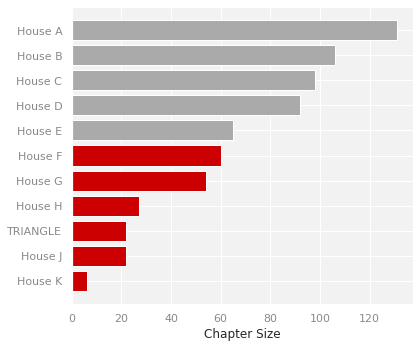

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm

sns.set_theme()
plt.tight_layout()

fig: plt.Figure = plt.figure(figsize=(6, 5))
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=1, ncols=1)

ifc_df = df[df["year"] == 2020]
print(ifc_df)

color = (ifc_df["gte_med_size"]).map({
    0: "#CC0000",
    1: "#AAAAAA",
#    2: "#CC7777"
})

# color.at["TRI"] = "#C08081"

ax0: plt.Axes = fig.add_subplot(gs[0,0])
ax0.set_facecolor("#F2F2F2")
ax0.barh(
    ifc_df["greek_name"],
    ifc_df["size"],
    color=color
)

print(ifc_df.iloc[0]["cnc_med"])

ax0.set_xlabel("Chapter Size")

# ax0.axhline(5, xmin=0.5, xmax=0.73, color='#CC7777')
# ax0.axhspan(4, 6, xmin=0.73, xmax=1.0, color="white")
# ax0.annotate(
#     f"Median: {ifc_df.iloc[0].cnc_med}",
#     xy=(106, 4.8),
#     color="#888888"
# )

ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    colors='#888888',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    # labelbottom=False  # labels along the bottom edge are off
) 

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

plt.savefig("output/ifc.png", format="png", dpi=500)
plt.show()

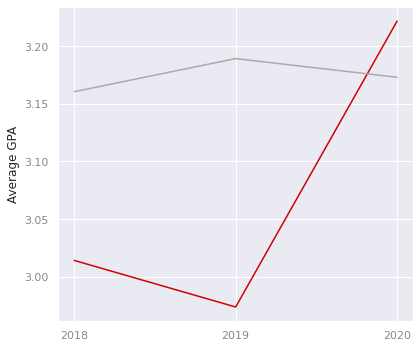

In [580]:
from matplotlib.ticker import MaxNLocator
fig: plt.Figure = plt.figure(figsize=(6, 5))
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=1, ncols=1)

ifc_sum = df[df["council"] == "IFC"].groupby(
    by = ["year", "gte_med_size"]
).sum()

avg_gpa = ifc_sum["tot_gpa"] / ifc_sum["size"]
sml_gpa = avg_gpa.loc[:, 0]
big_gpa = avg_gpa.loc[:, 1]

avg_svc = ifc_sum["serv_hrs"] / ifc_sum["size"]
sml_svc = avg_svc.loc[:, 0]
big_svc = avg_svc.loc[:, 1]

ax0: plt.Axes = fig.add_subplot(gs[0, 0])
ax0.plot(
    sml_gpa.index,
    sml_gpa,
    color="#CC0000"
)
ax0.plot(
    big_gpa.index,
    big_gpa,
    color="#AAAAAA"
)
ax0.set_ylabel("Average GPA")
ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    colors='#888888',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    # labelbottom=False  # labels along the bottom edge are off
) 

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

plt.savefig("output/gpa_lines.png", format="png", dpi=500)
plt.show()

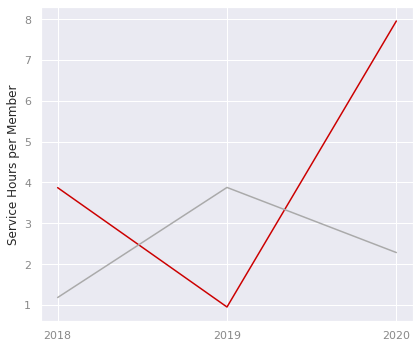

In [581]:
from matplotlib.ticker import MaxNLocator
fig: plt.Figure = plt.figure(figsize=(6, 5))
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=1, ncols=1)

ax0: plt.Axes = fig.add_subplot(gs[0, 0])
ax0.plot(
    sml_svc.index,
    sml_svc,
    color="#CC0000"
)
ax0.plot(
    big_svc.index,
    big_svc,
    color="#AAAAAA"
)
ax0.set_ylabel("Service Hours per Member")

ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    colors='#888888',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    # labelbottom=False  # labels along the bottom edge are off
) 

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

plt.savefig("output/svc_lines.png", format="png", dpi=500)
plt.show()